In [1]:
import serial
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def readArduinoData():
    data = []
    PORT = 0
    while True:
        try:
            RGBcircuit = serial.Serial("COM"+str(PORT), baudrate=9600, timeout=1)
            break
        except:
            PORT = PORT + 1

    print("PORT Connected to COM" + str(PORT))

    for index in range(1000):
        try:
            tempData = list(map(int ,RGBcircuit.readline().decode()[:-1].split(", ")))
            data.append(tempData)
        
            if index % 100 == 0:
                print("Progress -> {} %".format(index / 10))

        except UnicodeDecodeError:
            pass

        except KeyboardInterrupt:
            exit()

        except ValueError:
            exit()

    RGBcircuit.close()
    data = np.array(data, dtype="int16")
    average = np.mean(data, axis=1)
   
    return data, average

<h2> Regression Equations for R, G, B </h2>

$$R = 40.5785 \sqrt{I_{R} - 42.1185} - 239.378$$

$$G = 0.02052 (I_{G} + 347.788)^{1.5} - 43.2058$$

$$B = 0.02475 (I_{B} + 460.702)^{1.5} - 326.867$$



<h2> Inverse Equations for finding Intensity of each </h2>

$$I_{R} = (\frac{R + 239.378}{40.5785}) ^ {2} + 42.1185$$
<br>
$$I_{G} = (\frac{G + 43.2058}{0.02052}) ^ {\frac{2}{3}} - 347.788 $$
<br>
$$I_{B} = (\frac{B + 326.867}{0.02475}) ^ {\frac{2}{3}} - 460.702 $$

In [3]:
def InverteReadings(data):
    IR = np.power((data[:, 0] + 239.378) / 40.5785, 2) + 42.1185
    IG = np.power((data[:, 1] + 43.2058) / 0.02052, 2/3) - 367.788
    IB = np.power((data[:, 2] + 326.867) / 0.02475, 2/3) - 460.702

    return IR, IG, IB

In [4]:
data, average = readArduinoData()

PORT Connected to COM6
Progress -> 10.0 %
Progress -> 20.0 %
Progress -> 30.0 %
Progress -> 40.0 %
Progress -> 50.0 %
Progress -> 60.0 %
Progress -> 70.0 %
Progress -> 80.0 %
Progress -> 90.0 %


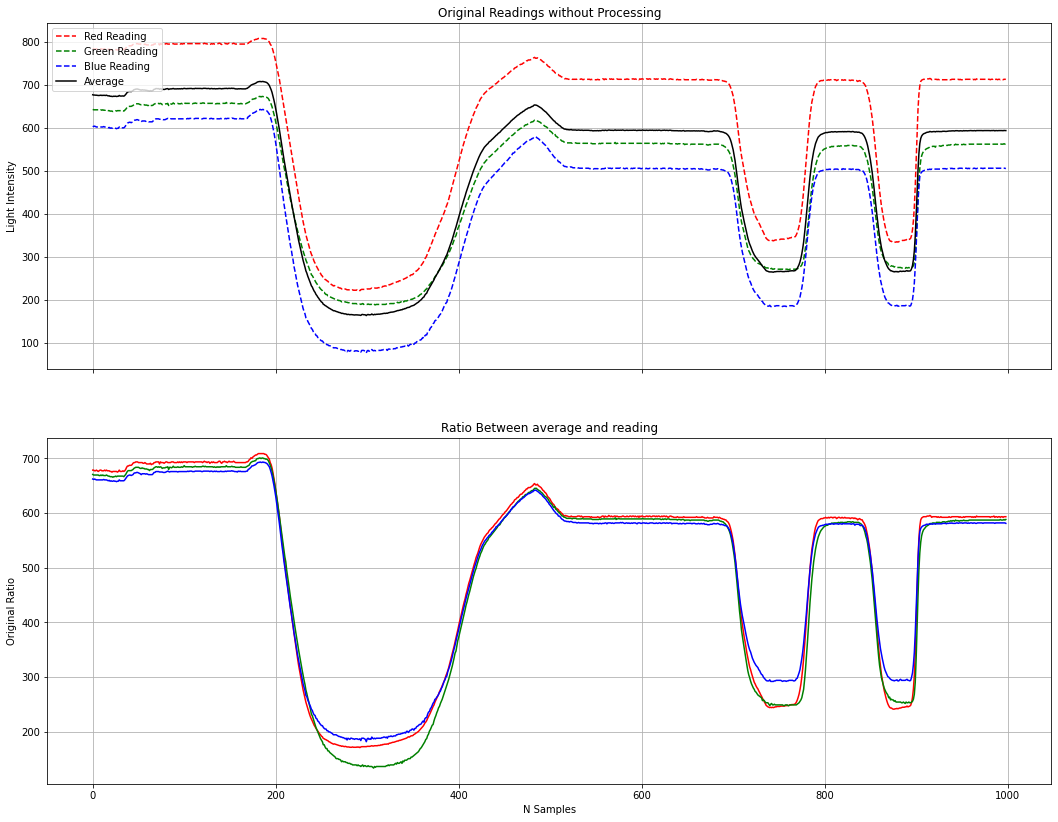

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (18, 14))

t = np.arange(0, data[:, 0].shape[0], 1)

ax[0].set_title("Original Readings without Processing")
ax[0].set_ylabel("Light Intensity")
ax[0].plot(t, data[:, 0], 'r--', label="Red Reading")
ax[0].plot(t, data[:, 1], 'g--', label="Green Reading")
ax[0].plot(t, data[:, 2], 'b--', label="Blue Reading")
ax[0].plot(t, average, 'k', label="Average")
ax[0].grid()
ax[0].legend(loc = 'upper left')

R, G, B = InverteReadings(data)

ax[1].set_xlabel("N Samples")
ax[1].set_title("Ratio Between average and reading")
ax[1].set_ylabel("Original Ratio")
ax[1].plot(t, R, 'r')
ax[1].plot(t, G, 'g')
ax[1].plot(t, B, 'b')
ax[1].grid()

plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
results = np.array([
[678,608,526,604],
[714,635,537,628],
[747,672,551,656],
[782,706,564,684],
[746,673,551,656],
[715,642,539,632],
[682,609,526,605],
[655,584,514,584],
[633,561,505,566],
[613,544,497,551],
[594,525,488,535],
[580,505,478,521],
[554,491,471,505],
[536,472,461,489],
[518,457,452,475],
[493,436,439,456],
[468,414,426,436],
[446,402,416,421],
[432,387,410,409],
[413,374,397,394],
[394,363,387,381],
[380,348,378,368],
[364,337,370,357],
[347,328,362,345],
[330,310,348,329],
[308,299,337,314],
[289,285,320,298],
[271,272,310,284],
[253,260,298,270],
[239,246,289,258],
[225,233,280,246],
[210,227,267,234],
[191,216,254,220],
[184,202,244,210],
], dtype="float64")

In [4]:

RGC = [[3714.2750367674116 , 281.9907034616211 , 0.1 ], 
       [0.013065432118179211 , 1335.9090733992175 , 1.5],
       [0.3260776975740072 , -188.96905355531214 , 1.2]]

RCONSTS = [-6646.2939872758525 , -486.6226029668186 , 56.54299632875735]

def doRegress(avg):
    red = RGC[0][0] * pow(avg + RGC[0][1], RGC[0][2]) + RCONSTS[0]
    grn = RGC[1][0] * pow(avg + RGC[1][1], RGC[1][2]) + RCONSTS[1]
    blu = RGC[2][0] * pow(avg + RGC[2][1], RGC[2][2]) + RCONSTS[2]
    
    
    return red, grn, blu

In [196]:
calibrate()

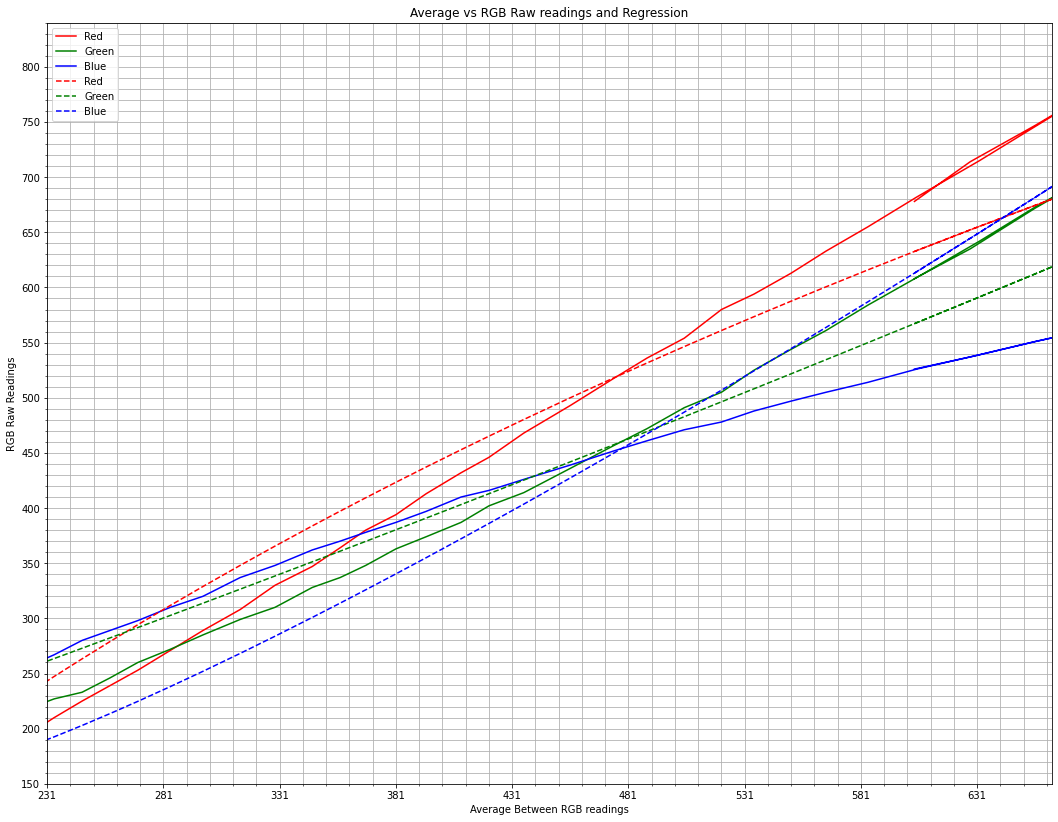

In [15]:
_ , ax = plt.subplots(1, 1, sharex=True, figsize = (18, 14))

ax.set_ylim(150, 800)

xlimits = (np.min(results[:, 3]) + 21, np.max(results[:, 3]) - 21)
ax.set_xlim(xlimits[0], xlimits[1])

major_xticks = np.arange(xlimits[0], xlimits[1], 50)
minor_xticks = np.arange(xlimits[0], xlimits[1], 10)

major_yticks = np.arange(150, 850, 50)
minor_yticks = np.arange(150, 850, 10)


ax.set_xlabel("Average Between RGB readings")

ax.set_title("Average vs RGB Raw readings and Regression")
ax.set_ylabel("RGB Raw Readings")

# ax.plot(results[:, 3], smooth(results[:, 0], 20), 'r', label="Red")
# ax.plot(results[:, 3], smooth(results[:, 1], 20), 'g', label="Green")
# ax.plot(results[:, 3], smooth(results[:, 2], 20), 'b', label="Blue")

ax.plot(results[:, 3], results[:, 0], 'r', label="Red")
ax.plot(results[:, 3], results[:, 1], 'g', label="Green")
ax.plot(results[:, 3], results[:, 2], 'b', label="Blue")

ax.plot(results[:, 3], doRegress(results[:, 3])[0], 'r--', label="Red")
ax.plot(results[:, 3], doRegress(results[:, 3])[1], 'g--', label="Green")
ax.plot(results[:, 3], doRegress(results[:, 3])[2], 'b--', label="Blue")

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.legend(loc = 'upper left')

In [8]:
def calibrate():
    global RCONSTS
    RCONSTS = [20, 20, 20] # null the array
    results_ = np.copy(results)
    
    for index, row in enumerate(results):
        cR, cG, cB = doRegress(row[3])
        results_[index][0] -= cR
        results_[index][1] -= cG
        results_[index][2] -= cB
        
    RCONSTS[0]  += np.mean(results_, axis=0)[0]
    RCONSTS[1]  += np.mean(results_, axis=0)[1]
    RCONSTS[2]  += np.mean(results_, axis=0)[2]

In [9]:
calibrate()

In [10]:
RCONSTS

[-6689.145089707209, -549.1555967439625, 161.13437160978788]

In [ ]:
g = []

In [11]:
from scipy.optimize import curve_fit

In [13]:
def regR(avg, c0, c1, c3):
    red = c0 * pow(avg + c1, 0.1) + c3
    return red

def regG(avg, c0, c1, c3):
    red = c0 * pow(avg + c1, 1.5) + c3
    return red

def regB(avg, c0, c1, c3):
    red = c0 * pow(avg + c1, 1.2) + c3
    return red

gr = np.array([3570.29, 207.846, -5988.26])
gg = np.array([0.021025, 292.054, -40.8424])
gb = np.array([0.286235, -148.018, 70.173])

cr, cov = curve_fit(regR, results[:, 3], results[:, 0], gr, maxfev = 100000)
cg, cov = curve_fit(regG, results[:, 3], results[:, 1], gg, maxfev = 100000)
cb, cov = curve_fit(regB, results[:, 3], results[:, 2], gb, maxfev = 100000)

const double PROGMEM RGC[3][3]{ //regression constants
      {3443.29 , 207.846 , 0.1}, // for red 
      {0.022325, 292.054 , 1.5}, // for green
      {0.286235, -148.018, 1.2}  // for blue
      };

double RCONSTS[3] = {-5988.26, -40.8424, 70.173}; // vertical adjustment

In [14]:
# now print int c form
print(r"const double PROGMEM RGC[3][3]{ //regression constants")
print("\t{" , cr[0] , "," , cr[1] , ", 0.1}, // for red")
print("\t{" , cg[0] , "," , cg[1] , ", 1.5}, // for green")
print("\t{" , cb[0] , "," , cb[1] , ", 1.2}, // for blue")
print("};")

print("double RCONSTS[3] = {",cr[2], ",", cg[2], ",", cb[2],"}; // vertical adjustment")

const double PROGMEM RGC[3][3]{ //regression constants
	{ 636001.0376489708 , 165409.19316159718 , 0.1}, // for red
	{ 0.0307475033803342 , 83.38789385867578 , 1.5}, // for green
	{ 0.036533711170305024 , 850560.6621504327 , 1.2}, // for blue
};
double RCONSTS[3] = { -2115106.925056781 , 52.7447217477211 , -476682.09714456595 }; // vertical adjustment
